# Trade Openness Regression Analysis

## Download the dataset 

In [ ]:
# Import libraries with functions for remote acccess to World Bank Indicators
from pandas_datareader import wb

# Import libraries for working with data
import pandas as pd
import numpy as np

In [5]:
# Get list of countries
countries = wb.get_countries()
countries.head()

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
0,,Oranjestad,ABW,High income,AW,12.51670,Not classified,-70.0167,Aruba,Latin America & Caribbean
1,South Asia,Kabul,AFG,Low income,AF,34.52280,IDA,69.1761,Afghanistan,South Asia
2,,,AFR,Aggregates,A9,NaN,Aggregates,NaN,Africa,Aggregates
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Lower middle income,AO,-8.81155,IBRD,13.2420,Angola,Sub-Saharan Africa
4,Europe & Central Asia (excluding high income),Tirane,ALB,Upper middle income,AL,41.33170,IBRD,19.8172,Albania,Europe & Central Asia


In [7]:
# We can use columns 'incomeLevel' or 'region' to isolate Aggregates
# Get indexes for countries where 'incomeLevel' is 'Aggregates'
agg_index = countries[countries['incomeLevel'] == 'Aggregates'].index

# Delete rows with indexes 'agg_index' from DataFrame
countries.drop(agg_index, inplace=True)

# unique() method gives unique values for column 'iso3c'
# tolist() makes a list from np.array
codes = countries['iso3c'].unique().tolist()

In [12]:
#to find GDP indicators
#wb.search(string='GDP per capita', field='name') 

#to find import and export indicators
#wb.search(string='Economy & Growth ; Trade', field='topics') 

#download the data
data = wb.download(country=codes, indicator=['NY.GDP.MKTP.CD','NY.GDP.PCAP.CD','NE.IMP.GNFS.CD','NE.EXP.GNFS.CD'], start=2017, end=2017)

#examine the data
data.head()

/Users/lucy/anaconda3/lib/python3.7/site-packages/pandas_datareader/wb.py:593: UserWarning: Non-standard ISO country codes: CHI, XKX
  "Non-standard ISO " "country codes: %s" % tmp, UserWarning


,,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NE.IMP.GNFS.CD,NE.EXP.GNFS.CD
country,year,,,,
Aruba,2017,2.700559e+09,25630.266492,2.031844e+09,1.912291e+09
Afghanistan,2017,2.019176e+10,556.302139,9.153344e+09,1.192286e+09
Angola,2017,1.221238e+11,4095.812942,2.839711e+10,3.542092e+10
Albania,2017,1.302506e+10,4532.890162,6.070288e+09,4.110274e+09
Andorra,2017,3.013387e+09,39134.393371,NaN,NaN


In [13]:
#rename columns
data.columns = ['gdp','gdp_ppc','imports','exports']
#create columns country and year from MultiIndex
data.reset_index(inplace=True) 
data.head()

,country,year,gdp,gdp_ppc,imports,exports
0,Aruba,2017,2.700559e+09,25630.266492,2.031844e+09,1.912291e+09
1,Afghanistan,2017,2.019176e+10,556.302139,9.153344e+09,1.192286e+09
2,Angola,2017,1.221238e+11,4095.812942,2.839711e+10,3.542092e+10
3,Albania,2017,1.302506e+10,4532.890162,6.070288e+09,4.110274e+09
4,Andorra,2017,3.013387e+09,39134.393371,NaN,NaN


In [14]:
data['openness'] = (data['imports'] + data['exports']) / data['gdp']
data.head()

,country,year,gdp,gdp_ppc,imports,exports,openness
0,Aruba,2017,2.700559e+09,25630.266492,2.031844e+09,1.912291e+09,1.460488
1,Afghanistan,2017,2.019176e+10,556.302139,9.153344e+09,1.192286e+09,0.512369
2,Angola,2017,1.221238e+11,4095.812942,2.839711e+10,3.542092e+10,0.522568
3,Albania,2017,1.302506e+10,4532.890162,6.070288e+09,4.110274e+09,0.781613
4,Andorra,2017,3.013387e+09,39134.393371,NaN,NaN,NaN


In [16]:
#isolate columns for analysis
data = data[['country','gdp_ppc','openness']]

#display correlation coefficient
data.corr()

,gdp_ppc,openness
gdp_ppc,1.000000,0.380745
openness,0.380745,1.000000


## Scatterplot

In [ ]:
# Import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.01, "The Association Between Trade Openness and Country's Level of Income")

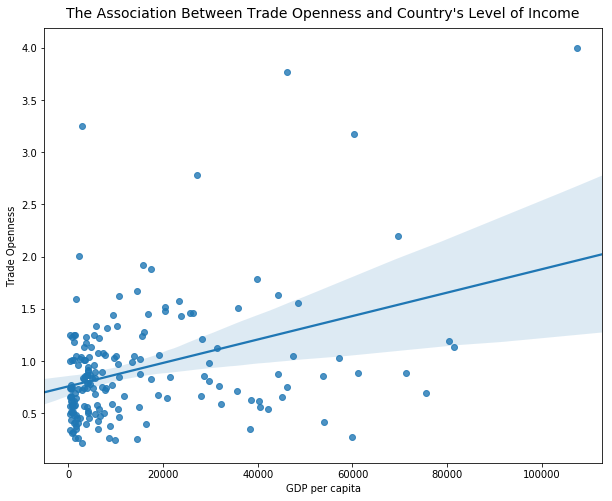

In [76]:
plt.figure(figsize=(10,8))
sns.regplot(x="gdp_ppc", y="openness", scatter=True, data=data)
plt.xlabel('GDP per capita')
plt.ylabel('Trade Openness')
plt.title ("The Association Between Trade Openness and Country's Level of Income", fontsize=14, y=1.01)

## Regression Model

OLS regression model for the association between Trade Openness and Country's Level of Income

In [77]:
# Import statistical libraries
import statsmodels.api
import statsmodels.formula.api as smf

# Build Linear Regression (also called Ordinary Least Squares (OLS) Regression)
model = smf.ols('openness ~ gdp_ppc', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               openness   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     30.35
Date:                Wed, 27 May 2020   Prob (F-statistic):           1.24e-07
Time:                        23:24:54   Log-Likelihood:                -141.20
No. Observations:                 181   AIC:                             286.4
Df Residuals:                     179   BIC:                             292.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7570      0.049     15.299      0.000       0.659       0.855
gdp_ppc     1.123e-05   2.04e-06      5.509      0.000    7.21e-06    1.52e-05
==============================================================================
Omnibus:                       83.832   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.149
Skew:                           1.788   Prob(JB):                     9.25e-77
Kurtosis:                       8.800   Cond. No.                     3.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Findings

The results are statistically significant. Both p-values for intercept and GDP per capita are less than 0.0001. 
However, according to the specified model, variation in GDP per capita explains only 14,5% of the variation in trade openness. The relationship between trade openness and income level (measured as GPD per capita) positive. An increase in income by one dollar per person increases trade openness of the country by 0.000011230.

## Testing Assumptions

### Independance

Observations on countries can be considered independent of each other.

### Normality

Text(0.5, 1.01, 'The Distribution of Residuals')

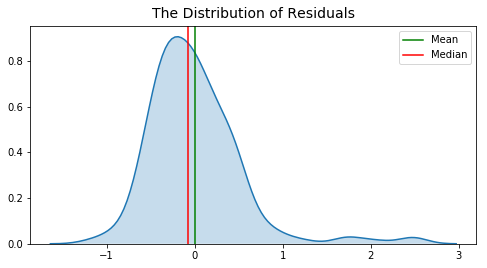

In [82]:
predicted_y = model.predict()
residuals = model.resid

#set figure size
plt.figure(figsize=(8,4))

# Plot kernel density distribution of residuals
sns.kdeplot(residuals, shade=True)

# Plot vertical line on the mean of the distribution
plt.axvline(residuals.mean(), color='green')

# Plot vertical line on the median of the distribution
plt.axvline(residuals.median(), color='red')

plt.legend(labels=['Mean','Median'])

plt.title("The Distribution of Residuals", fontsize=14, y=1.01)

Residuals do have mean of 0, but distribution is right-skewed.

### Lenearity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

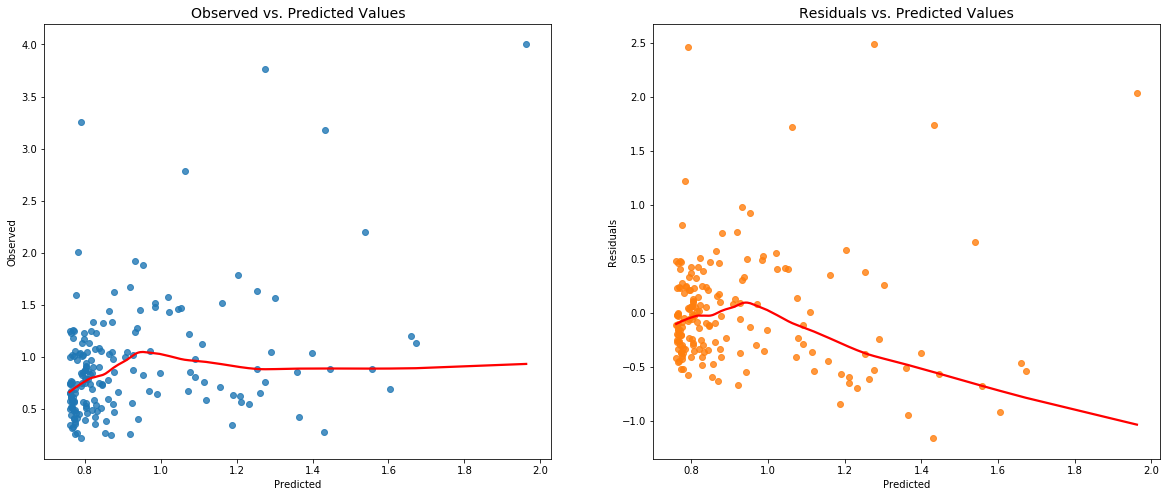

In [74]:
# Set two axes on one figure
fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot linear regression model fit for Observed vs. Predicted Values
sns.regplot(x=predicted_y, y=data['openness'].dropna(), lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=14)
ax[0].set(xlabel='Predicted', ylabel='Observed')

# Plot linear regression model fit for Residuals vs. Predicted Values
sns.regplot(x=predicted_y, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=14)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

The relationship is clearly non-linear.

### Homoscedasticity

Text(0.5, 1.01, 'The Variance of Residuals')

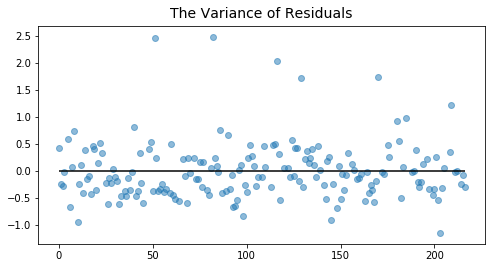

In [84]:
plt.figure(figsize=(8,4))

# Plot a scatterplot of residuals
plt.scatter(x=resids.index, y=resids, alpha=0.5)

# Plot vertical line. Residuals should be symmetrical
plt.hlines(0,resids.index.min(),resids.index.max())

plt.title("The Variance of Residuals", fontsize=14, y=1.01)

The variance of residuals are not constant.

## Conclusions

Since the relationship between trade openness and the income level of the country statistically significant, but tests show that the model is not correctly specified, the next logical step would be to transform variables. 